In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.tsa.vector_ar.var_model import VARResults

In [6]:
mdata = sm.datasets.macrodata.load_pandas().data

mdata.index = pd.period_range('1959-03-31', '2009-09-30', freq='Q')

mdata = mdata[['realgdp','realcons','realinv']]

data = np.log(mdata).diff().dropna()

In [7]:
data

,realgdp,realcons,realinv
1959Q2,0.024942,0.015286,0.080213
1959Q3,-0.001193,0.010386,-0.072131
1959Q4,0.003495,0.001084,0.034425
1960Q1,0.022190,0.009534,0.102664
1960Q2,-0.004685,0.012572,-0.106694
...,...,...,...
2008Q3,-0.006781,-0.008948,-0.017836
2008Q4,-0.013805,-0.007843,-0.069165
2009Q1,-0.016612,0.001511,-0.175598
2009Q2,-0.001851,-0.002196,-0.067561


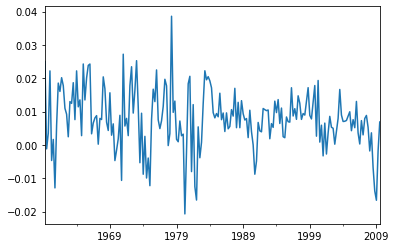

In [15]:
data['realgdp'].plot()

In [12]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [13]:
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "realgdp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9729
 No. Lags Chosen       = 1
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "realcons" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.992
 No. Lags Chosen       = 2
 Critical value 1%     = -3.464
 Critical value 5%     = -2.876
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "realinv" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

In [16]:
# make a VAR model
model = VAR(data)

In [17]:
model.select_order(maxlags=12).summary()

,AIC,BIC,FPE,HQIC
0,-27.72,-27.67,9.157e-13,-27.70
1,-28.05,-27.84*,6.596e-13,-27.96*
2,-28.05,-27.69,6.594e-13,-27.90
3,-28.06*,-27.54,6.542e-13*,-27.85
4,-28.04,-27.37,6.640e-13,-27.77
5,-28.03,-27.21,6.741e-13,-27.69
6,-27.98,-27.00,7.101e-13,-27.58
7,-27.94,-26.81,7.365e-13,-27.48
8,-27.94,-26.66,7.376e-13,-27.42
9,-27.97,-26.53,7.191e-13,-27.39


In [19]:
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 04, Aug, 2020
Time:                     15:23:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.7388
Nobs:                     201.000    HQIC:                  -27.8562
Log likelihood:           1963.94    FPE:                7.37174e-13
AIC:                     -27.9360    Det(Omega_mle):     6.94859e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.003580         0.000911            3.928           0.000
L1.realgdp         -0.338056         0.172084           -1.964           0.049
L1.realcons         0.746283         0.130411            5.723    

In [23]:
results.params

,realgdp,realcons,realinv
const,0.003580,0.006286,-0.015808
L1.realgdp,-0.338056,-0.134053,-2.220857
L1.realcons,0.746283,0.327751,4.585966
L1.realinv,0.057939,0.042521,0.300989


In [27]:
# results.endog_lagged

array([[ 1.00000000e+00,  2.49421308e-02,  1.52861074e-02,
         8.02126813e-02],
       [ 1.00000000e+00, -1.19295211e-03,  1.03859777e-02,
        -7.21310437e-02],
       [ 1.00000000e+00,  3.49453265e-03,  1.08401095e-03,
         3.44251112e-02],
       [ 1.00000000e+00,  2.21901795e-02,  9.53415088e-03,
         1.02663768e-01],
       [ 1.00000000e+00, -4.68455328e-03,  1.25724280e-02,
        -1.06693845e-01],
       [ 1.00000000e+00,  1.63288019e-03, -3.96792652e-03,
        -5.97787919e-03],
       [ 1.00000000e+00, -1.29063599e-02,  1.34303322e-03,
        -1.31852018e-01],
       [ 1.00000000e+00,  5.92259126e-03, -2.79649880e-04,
         2.52441808e-02],
       [ 1.00000000e+00,  1.85345342e-02,  1.47698410e-02,
         7.18338737e-02],
       [ 1.00000000e+00,  1.60316392e-02,  4.83863043e-03,
         8.04527066e-02],
       [ 1.00000000e+00,  2.01528160e-02,  1.98230620e-02,
         1.67371134e-02],
       [ 1.00000000e+00,  1.77772593e-02,  1.05911661e-02,
      

In [ ]:
VARResults(endog, endog_lagged, params, sigma_u, lag_order, model=None, trend='c', names=None, dates=None, exog=None)[source]¶

In [ ]:
# results.plot()

In [ ]:
# results.plot_acorr()

In [ ]:
results = model.fit(maxlags=15, ic='aic')

In [ ]:
results.summary()

In [ ]:
VARResults